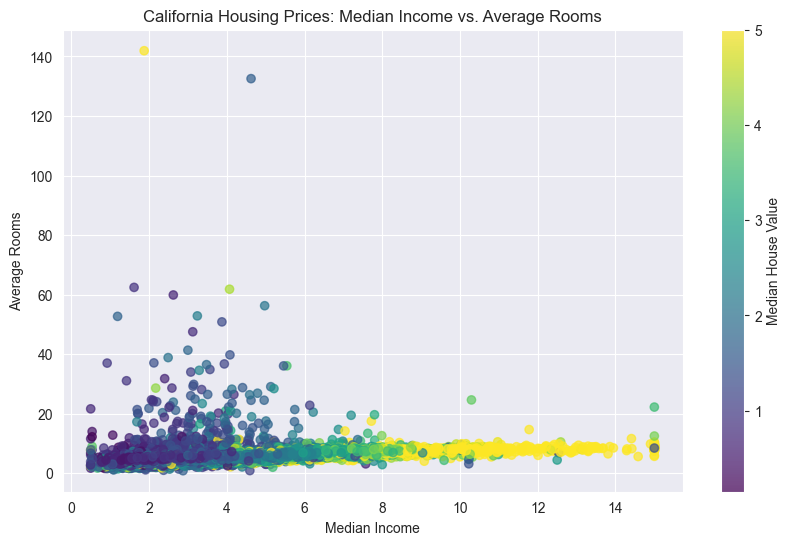

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# 캘리포니아 집값 데이터셋 로드
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
target = pd.DataFrame(california_housing.target, columns=["MedHouseValue"])

# 주택 가격과 특성 선택
selected_features = ['MedInc', 'AveRooms']
X = data[selected_features]
y = target['MedHouseValue']

# 2D 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(X['MedInc'], X['AveRooms'], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label='Median House Value')  # 컬러바 추가
plt.xlabel('Median Income')
plt.ylabel('Average Rooms')
plt.title('California Housing Prices: Median Income vs. Average Rooms')
plt.grid(True)
plt.show()


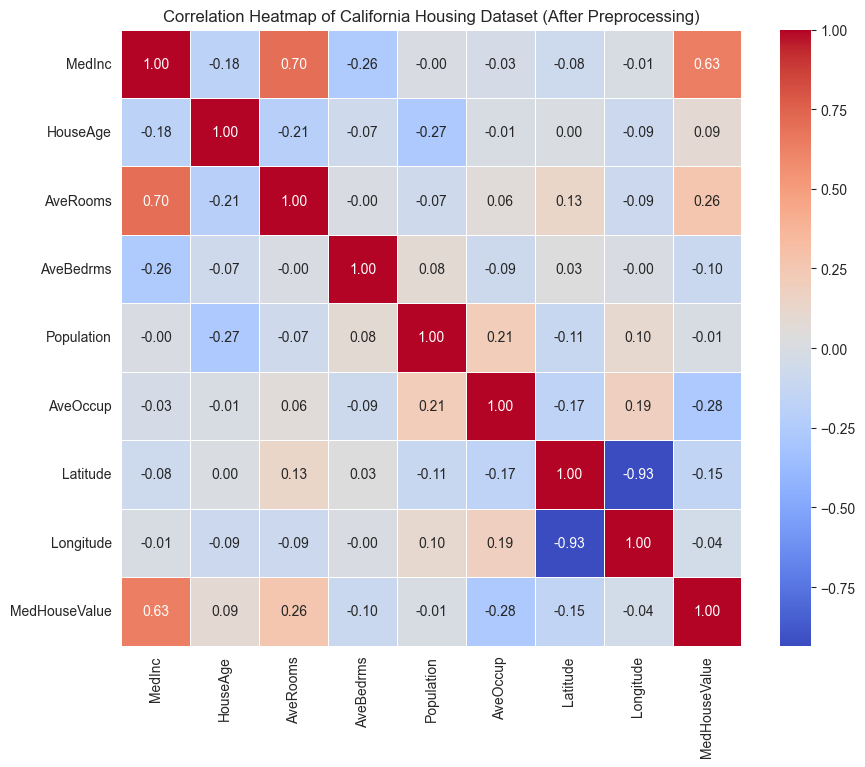

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# 캘리포니아 집값 데이터셋 로드
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
target = pd.DataFrame(california_housing.target, columns=["MedHouseValue"])

# 결측치 제거
housing_data = pd.concat([data, target], axis=1).dropna()

# 이상치 제거 (간단한 방법으로 IQR을 사용하여 이상치를 탐지하는 것도 가능합니다)
Q1 = housing_data.quantile(0.25)
Q3 = housing_data.quantile(0.75)
IQR = Q3 - Q1
housing_data = housing_data[~((housing_data < (Q1 - 1.5 * IQR)) | (housing_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Z 인덱스 정규화
scaler = StandardScaler()
housing_data_zscore = scaler.fit_transform(housing_data)

# 데이터프레임으로 변환
housing_data_normalized = pd.DataFrame(housing_data_zscore, columns=housing_data.columns)

# 피어슨 상관 계수 계산
correlation_matrix = housing_data_normalized.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of California Housing Dataset (After Preprocessing)')
plt.show()


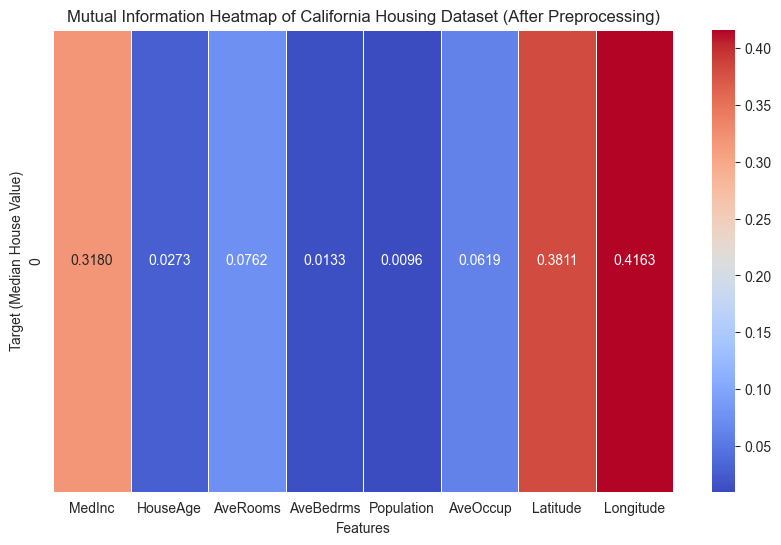

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

# 캘리포니아 집값 데이터셋 로드
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
target = pd.DataFrame(california_housing.target, columns=["MedHouseValue"])

# 결측치 제거
housing_data = pd.concat([data, target], axis=1).dropna()

# 이상치 제거 (간단한 방법으로 IQR을 사용하여 이상치를 탐지하는 것도 가능합니다)
Q1 = housing_data.quantile(0.25)
Q3 = housing_data.quantile(0.75)
IQR = Q3 - Q1
housing_data = housing_data[~((housing_data < (Q1 - 1.5 * IQR)) | (housing_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Z 인덱스 정규화
scaler = StandardScaler()
housing_data_normalized = scaler.fit_transform(housing_data)

# mutual_info_regression을 사용하여 상호 정보량 계산
mutual_info = mutual_info_regression(housing_data_normalized[:, :-1], housing_data_normalized[:, -1])

# 결과를 히트맵으로 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(mutual_info.reshape(1, -1), annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5,
            xticklabels=housing_data.columns[:-1])
plt.title('Mutual Information Heatmap of California Housing Dataset (After Preprocessing)')
plt.xlabel('Features')
plt.ylabel('Target (Median House Value)')
plt.show()


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras

# 캘리포니아 집값 데이터셋 로드
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
target = pd.DataFrame(california_housing.target, columns=["MedHouseValue"])

# 결측치 제거
housing_data = pd.concat([data, target], axis=1).dropna()

# 이상치 제거 (간단한 방법으로 IQR을 사용하여 이상치를 탐지하는 것도 가능합니다)
Q1 = housing_data.quantile(0.25)
Q3 = housing_data.quantile(0.75)
IQR = Q3 - Q1
housing_data = housing_data[~((housing_data < (Q1 - 1.5 * IQR)) | (housing_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Z 인덱스 정규화
scaler = StandardScaler()
housing_data_normalized = scaler.fit_transform(housing_data)

# 특성과 타겟 분리
X = housing_data_normalized[:, :-1]
y = housing_data_normalized[:, -1]

# 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 테스트 세트로 예측
y_pred = model.predict(X_test)

# 예측된 결과값 출력
print("예측된 결과값:", y_pred)


NameError: name 'model' is not defined

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras

# 캘리포니아 집값 데이터셋 로드
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
target = pd.DataFrame(california_housing.target, columns=["MedHouseValue"])

# 결측치 제거
housing_data = pd.concat([data, target], axis=1).dropna()

# 이상치 제거 (간단한 방법으로 IQR을 사용하여 이상치를 탐지하는 것도 가능합니다)
Q1 = housing_data.quantile(0.25)
Q3 = housing_data.quantile(0.75)
IQR = Q3 - Q1
housing_data = housing_data[~((housing_data < (Q1 - 1.5 * IQR)) | (housing_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Z 인덱스 정규화
scaler = StandardScaler()
housing_data_normalized = scaler.fit_transform(housing_data)

# 특성과 타겟 분리
X = housing_data_normalized[:, :-1]
y = housing_data_normalized[:, -1]

# 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Keras 모델 구축
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

# 테스트 세트로 예측
y_pred = model.predict(X_test)

# 예측된 결과값 출력
print("예측된 결과값:", y_pred)


Epoch 1/100
327/327 [==============================] - 1s 2ms/step - loss: 0.4037 - mae: 0.4751 - val_loss: 0.3248 - val_mae: 0.4213
Epoch 2/100
327/327 [==============================] - 0s 1ms/step - loss: 0.3163 - mae: 0.4174 - val_loss: 0.3054 - val_mae: 0.4075
Epoch 3/100
327/327 [==============================] - 0s 1ms/step - loss: 0.2985 - mae: 0.4024 - val_loss: 0.3167 - val_mae: 0.3985
Epoch 4/100
327/327 [==============================] - 0s 1ms/step - loss: 0.2916 - mae: 0.3964 - val_loss: 0.3016 - val_mae: 0.4100
Epoch 5/100
327/327 [==============================] - 0s 1ms/step - loss: 0.2846 - mae: 0.3906 - val_loss: 0.2938 - val_mae: 0.4007
Epoch 6/100
327/327 [==============================] - 0s 1ms/step - loss: 0.2774 - mae: 0.3833 - val_loss: 0.2959 - val_mae: 0.4018
Epoch 7/100
327/327 [==============================] - 0s 1ms/step - loss: 0.2750 - mae: 0.3817 - val_loss: 0.2804 - val_mae: 0.3787
Epoch 8/100
327/327 [==============================] - 0s 1ms/step - 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras

# 캘리포니아 집값 데이터셋 로드
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
target = pd.DataFrame(california_housing.target, columns=["MedHouseValue"])

# 결측치 제거
housing_data = pd.concat([data, target], axis=1).dropna()

# 이상치 제거
Q1 = housing_data.quantile(0.25)
Q3 = housing_data.quantile(0.75)
IQR = Q3 - Q1
housing_data = housing_data[~((housing_data < (Q1 - 1.5 * IQR)) | (housing_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# 특성 스케일링
features_scaler = StandardScaler()
features = features_scaler.fit_transform(housing_data.drop(columns=["MedHouseValue"]))

# 타겟 스케일링
target_scaler = StandardScaler()
target = target_scaler.fit_transform(housing_data[["MedHouseValue"]])

# 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Keras 모델 구축
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

# 테스트 세트로 예측
y_pred = model.predict(X_test)

# 역정규화
y_test_denormalized = target_scaler.inverse_transform(y_test)
y_pred_denormalized = target_scaler.inverse_transform(y_pred)

# 출력
print("실제 주택 가격:", y_test_denormalized)




Epoch 1/100
327/327 [==============================] - 1s 1ms/step - loss: 0.4022 - mae: 0.4725 - val_loss: 0.3237 - val_mae: 0.4292
Epoch 2/100
327/327 [==============================] - 0s 800us/step - loss: 0.3111 - mae: 0.4120 - val_loss: 0.3155 - val_mae: 0.4097
Epoch 3/100
327/327 [==============================] - 0s 829us/step - loss: 0.2971 - mae: 0.3997 - val_loss: 0.2992 - val_mae: 0.4004
Epoch 4/100
327/327 [==============================] - 0s 900us/step - loss: 0.2894 - mae: 0.3936 - val_loss: 0.2940 - val_mae: 0.3926
Epoch 5/100
327/327 [==============================] - 0s 843us/step - loss: 0.2831 - mae: 0.3874 - val_loss: 0.2887 - val_mae: 0.3866
Epoch 6/100
327/327 [==============================] - 0s 888us/step - loss: 0.2788 - mae: 0.3830 - val_loss: 0.2814 - val_mae: 0.3783
Epoch 7/100
327/327 [==============================] - 0s 828us/step - loss: 0.2714 - mae: 0.3766 - val_loss: 0.2752 - val_mae: 0.3832
Epoch 8/100
327/327 [==============================] - 0s

In [19]:
from sklearn.model_selection import KFold

# k-fold 설정
k = 5
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# 결과를 저장할 리스트
validation_scores = []

# k-fold 교차검증 수행
for train_index, val_index in kfold.split(features, target):
    # 훈련 세트와 검증 세트로 분할
    X_train, X_val = features[train_index], features[val_index]
    y_train, y_val = target[train_index], target[val_index]

    # 모델 구성
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])

    # 모델 컴파일
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # 모델 훈련
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=32, verbose=1)

    # 검증 세트로 모델 평가
    val_score = model.evaluate(X_val, y_val, verbose=1)

    # 결과 저장
    validation_scores.append(val_score)

# 평균 검증 점수 출력
average_validation_score = np.mean(validation_scores)
print('Average validation score: ', average_validation_score)


Epoch 1/100
408/408 [==============================] - 1s 1ms/step - loss: 0.4018 - mae: 0.4741 - val_loss: 0.3177 - val_mae: 0.4125
Epoch 2/100
408/408 [==============================] - 0s 953us/step - loss: 0.3142 - mae: 0.4138 - val_loss: 0.3087 - val_mae: 0.4063
Epoch 3/100
408/408 [==============================] - 0s 957us/step - loss: 0.2979 - mae: 0.4001 - val_loss: 0.2855 - val_mae: 0.3900
Epoch 4/100
408/408 [==============================] - 0s 903us/step - loss: 0.2888 - mae: 0.3918 - val_loss: 0.2778 - val_mae: 0.3824
Epoch 5/100
408/408 [==============================] - 0s 913us/step - loss: 0.2809 - mae: 0.3853 - val_loss: 0.3071 - val_mae: 0.4130
Epoch 6/100
408/408 [==============================] - 0s 1ms/step - loss: 0.2726 - mae: 0.3782 - val_loss: 0.2673 - val_mae: 0.3712
Epoch 7/100
408/408 [==============================] - 0s 1ms/step - loss: 0.2669 - mae: 0.3727 - val_loss: 0.2682 - val_mae: 0.3762
Epoch 8/100
408/408 [==============================] - 0s 1ms

In [20]:
# k-fold 교차검증 수행
for train_index, val_index in kfold.split(features, target):
    # 훈련 세트와 검증 세트로 분할
    X_train, X_val = features[train_index], features[val_index]
    y_train, y_val = target[train_index], target[val_index]

    # 모델 구성
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)
    ])

    # 모델 컴파일
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # 모델 훈련
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=32, verbose=1)

    # 검증 세트로 모델 평가
    val_score = model.evaluate(X_val, y_val, verbose=1)

    # 결과 저장
    validation_scores.append(val_score)

# 평균 검증 점수 출력
average_validation_score = np.mean(validation_scores)
print('Average validation score: ', average_validation_score)


Epoch 1/100
408/408 [==============================] - 1s 1ms/step - loss: 0.3678 - mae: 0.4511 - val_loss: 0.3142 - val_mae: 0.4038
Epoch 2/100
408/408 [==============================] - 0s 926us/step - loss: 0.2978 - mae: 0.3997 - val_loss: 0.2965 - val_mae: 0.3901
Epoch 3/100
408/408 [==============================] - 0s 1ms/step - loss: 0.2840 - mae: 0.3871 - val_loss: 0.2761 - val_mae: 0.3932
Epoch 4/100
408/408 [==============================] - 1s 1ms/step - loss: 0.2699 - mae: 0.3752 - val_loss: 0.2676 - val_mae: 0.3779
Epoch 5/100
408/408 [==============================] - 0s 1ms/step - loss: 0.2580 - mae: 0.3651 - val_loss: 0.2591 - val_mae: 0.3718
Epoch 6/100
408/408 [==============================] - 0s 1ms/step - loss: 0.2494 - mae: 0.3581 - val_loss: 0.2527 - val_mae: 0.3677
Epoch 7/100
408/408 [==============================] - 0s 978us/step - loss: 0.2426 - mae: 0.3517 - val_loss: 0.2400 - val_mae: 0.3475
Epoch 8/100
408/408 [==============================] - 0s 1ms/ste

In [22]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units',
                                              min_value=32,
                                              max_value=512,
                                              step=32),
                                 activation='relu'))
    model.add(keras.layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3)

tuner.search_space_summary()

tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_val, y_val))

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


Trial 5 Complete [00h 00m 08s]
val_mean_absolute_error: 0.3871019383271535

Best val_mean_absolute_error So Far: 0.38318126400311786
Total elapsed time: 00h 00m 39s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 352 and the optimal learning rate for the optimizer
is 0.01.
